## LinkedList
- 자료의 양이 정해져 있지 않거나, 자료를 추가하거나 삭제하는 일이 많다면 연결 리스트가 적합하다.

> 1. 첫째 노드를 만들고 head라는 이름표를 붙인다. (head에 첫째 노드를 할당)
> 2. 둘째 노드를 만들고, head의 next가 둘째 노드를 가리키도록 한다.
> 3. 셋째 노드를 만들고, head의 next의 next가 셋째 노드를 가리키도록 한다.

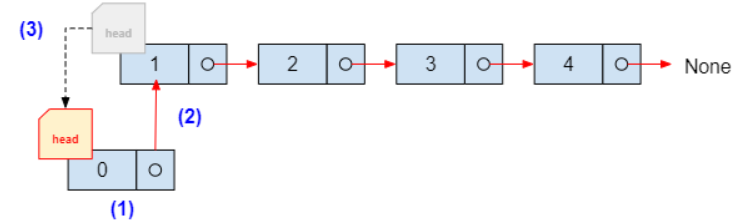
appendHead 함수 예시

In [8]:
class Node():
    def __init__(self,data):
        self.data = data
        self.next = None
        
class LinkedList():
    def __init__(self):
        self.head = None
        self.count = 0
        
    def appendHead(self,node):
        if self.head == None:
            self.head = node
            self.count = 1
        else:
            self.count += 1
            currentHead = self.head
            self.head = node
            node.next = currentHead
            
    def append(self, node):
        if self.head == None:
            self.head = node
            self.count =1
        else:
            now = self.head
            while now.next != None:
                now =now.next
            now.next = node
            self.count += 1
            
    def insertNodeAtIndex(self, node, index):
        if index < 0 or index > self.count:
            return -1
        elif self.count == index:
            self.append(node)
        elif index == 0:
            self.appendHead(node)
        else: 
            now = self.head
            while index > 0 :
                index -=1
                now = now.index
            self.count += 1
            next = now.next
            now.next = node
            node.next = now
    
    def deleteData(self, data):
        if self.head.data == data:
            self.head = self.head.next
            self.count -=1
        else:
            first = self.head
            second = first.next
            while second != None:
                if second.data == data:
                    first.next =second.next
                    self.count -= 1
                    break
                first = second
                second = second.next
    def getCount(self):
        return self.count          

In [ ]:
# 트라이(Trie) 구조
# ex. 검색어 자동 완성

class Node():
    def __init__(self, data):
        self.data = data
        self.children = {}

class Trie():
    def __init__(self, data):
        self.head = Node(None)
    def insert(self, string):
        head = self.head
        for s in string:
            children = head.children
            if s not in children:
                children[s] = Node(s)
            head = children[s]

## 프로그래머스) 길찾기 게임

- 트리를 구성하는 모든 노드의 x, y 좌표 값은 정수이다.
- 모든 노드는 서로 다른 x값을 가진다.
- 같은 레벨(level)에 있는 노드는 같은 y 좌표를 가진다.
- 자식 노드의 y 값은 항상 부모 노드보다 작다.
- 임의의 노드 V의 왼쪽 서브 트리(left subtree)에 있는 모든 노드의 x값은 V의 x값보다 작다.
- 임의의 노드 V의 오른쪽 서브 트리(right subtree)에 있는 모든 노드의 x값은 V의 x값보다 크다.

- 전위 순회는 뿌리->왼쪽 자식->오른쪽 자식 순
- 후위 순회는 왼쪽자식->오른쪽 자식-> 뿌리

In [56]:
nodeinfo =[[5,3],[11,5],[13,3],[3,5],[6,1],[1,3],[8,6],[7,2],[2,2]]

In [59]:
class trie():
    def __init__(self, node):
        self.head = None
        self.child = {}

order = []
nodeinfo_index = list(enumerate(nodeinfo)) # 인덱스 저장
nodeinfo_sorted = nodeinfo.copy()
nodeinfo_sorted.sort(key = lambda x: (x[1],x[0])) # y좌표 오름차순

cv = nodeinfo_sorted.pop()
root = trie(cv)
y = cv[1]
while nodeinfo_sorted:
    cv = nodeinfo_sorted.pop()
    if cv[1] == y:
        root.chlid = cv
    else:
        y = cv[1]
        new_root = trie(cv)
        new_root.head = root
        root = new_root

AttributeError: 'trie' object has no attribute 'chlid'

- step
- 1. 각 노드에 순서를 매긴다.
- 2. 노드의 고유한 레벨값(y좌표)을 찾는다.
- 3. 레벨 순서대로 역순 정렬한다.
> 레벨이 동일한 경우, x좌표가 작은 순서대로 정렬한다.
- 4. 트리에 각 순서값을 삽입한다
> 각 레벨에 대해, 부모 노드의 x값보다 작으면 왼쪽 노드에 삽입/크면 오른쪽 노드에 삽입
- 5. 전위순환/후위순환

In [ ]:
class TreeNode:
    def __init__(self, val, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right
def solution(nodeinfo):
    levels = sorted(list({x[1] for x in nodeinfo}), reverse = True)
    nodeinfo = [i+[idx+1] for idx, i in enumerate(nodeinfo)]
    